In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
#%matplotlib inline

This section goes through the sample process that is used to identify and crop a face from an sample image. cv2 reads the image and uses certain haar cascade configurations to detect a face and eyes from a grayed image.

In [2]:
img = cv2.imread('./test_image_srk.jpg')
img.shape

(1422, 1000, 3)

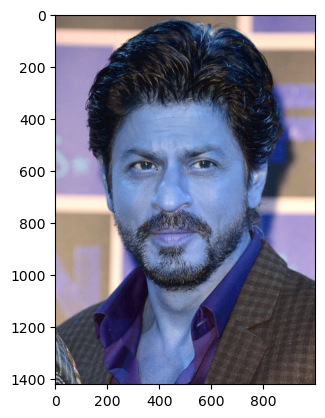

In [3]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1422, 1000)

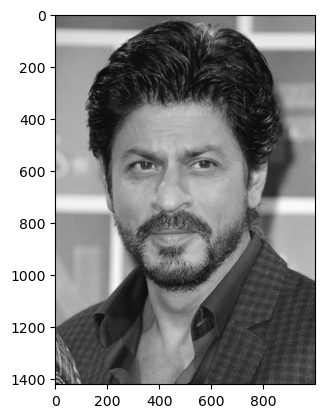

In [7]:
plt.imshow(gray, cmap='gray')

The frontal face cascade is used to identify which region of the image contains the face and return it as an array of x,y, height, width.

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[133, 334, 649, 649]])

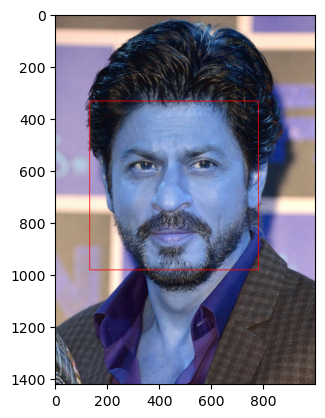

In [10]:
(x,y,w,h) = faces[0]
face = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face)

Now the eye cascade can be used to identify and display both eye regions.

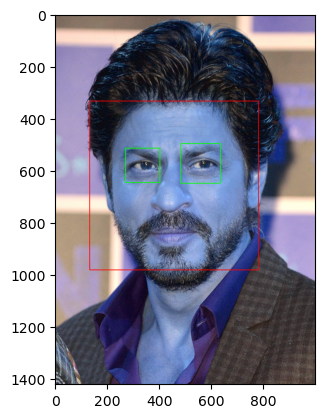

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show() 

Lastly, the ROI(region of interest) is returned and displayed below.

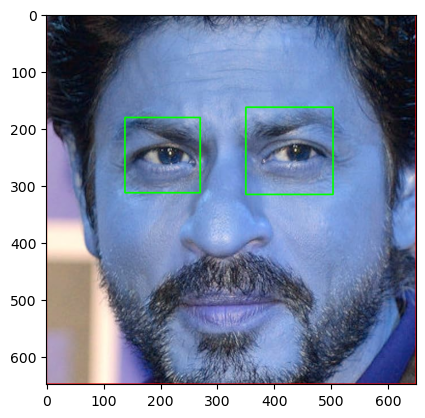

In [14]:
plt.imshow(roi_color, cmap='gray')

Given an image file path, the following function returns the ROI image as long as 2 eyes are detected. 

In [19]:
def get_cropped_image(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


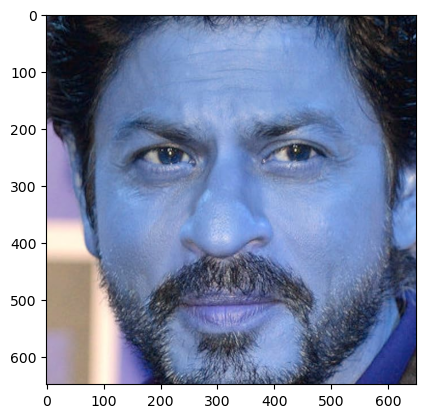

In [20]:
cropped_img = get_cropped_image('./test_image_srk.jpg')
plt.imshow(cropped_img)

When 2 eyes are not visible, for example, when the subject is wearing sunglasses, the function will return none.

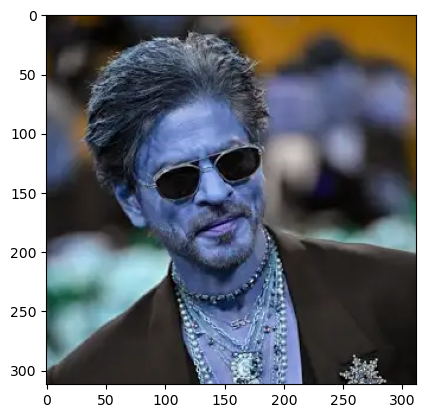

In [22]:
bad_image = cv2.imread('./test_image_srk_bad.webp')
plt.imshow(bad_image)

In [ ]:
cropped_img_bad = get_cropped_image('./test_image_srk_bad.webp')
cropped_img_bad
#Returns None

The following section applies the created function to all of the raw images, creating new directories for cropped images and discarding invalid ones. 

In [26]:
import os
dataset_path = "./dataset/"
cropped_path = "./dataset/cropped/"

img_dirs = []
for folder in os.scandir(dataset_path):
    if folder.is_dir():
        img_dirs.append(folder.path)

img_dirs

['./dataset/alia_bhatt',
 './dataset/amitabh_bachchan',
 './dataset/deepika_padukone',
 './dataset/hrithik_roshan',
 './dataset/shah_rukh_khan']

In [ ]:
import shutil
if os.path.exists(cropped_path):
    shutil.rmtree(cropped_path)
os.mkdir(cropped_path)

#remakes cropped folder

In [31]:
cropped_img_dirs = []
actor_filenames_dict = {}

#for each actor folder in the dataset, makes a new folder for the actor in the cropped dir where processed images will be stored
for img_dir in img_dirs:
    count = 1
    actor_name = img_dir.split('/')[-1]

    actor_filenames_dict[actor_name] = []
    
    #for each image, get cropped image and write to folder if valid
    for img in os.scandir(img_dir):
        roi_color = get_cropped_image(img.path)
        if roi_color is not None:
            cropped_folder = cropped_path + actor_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
            cropped_file_name = actor_name + str(count) + ".png"
            cropped_file_path = cropped_folder + '/' + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            actor_filenames_dict[actor_name].append(cropped_file_path)
            count += 1
